In [8]:
#importing all the necessary libs
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

In [9]:
os.chdir('/home/rhythm/Research/PhD/ResearchProgress/22-Fall/Oct/txt')

In [10]:
columns = ["KE", "E1","E2","t1","t2","costh"]#,"px_in_det1","px_in_det2","py_in_det1","py_in_det2", "pz_in_det1", "pz_in_det2" ]
            

In [11]:
type = {"KE": np.uint16, "E1" : np.float32,"E2" : np.float32,"t1": np.float32,"t2": np.float32,"costh": np.float32}#,"px_in_det1": np.float32,"px_in_det2" : np.float32,"py_in_det1":np.float32,"py_in_det2":np.float32, "pz_in_det1":np.float32, "pz_in_det2":np.float32}

## Type 1
 

### Foil 0 


In [12]:
foil0type1 = pd.read_csv('./foil0-type1.txt', index_col=False,sep = " ", dtype = type,header = None, names = columns)


## Foil 1

In [13]:
foil1type1 = pd.read_csv('./foil1-type1.txt', index_col=False,sep = " ", dtype = type,header = None, names = columns)


## Foil 2

In [14]:
foil2type1 = pd.read_csv('./foil2-type1.txt', index_col=False,sep = " ", dtype = type,header = None, names = columns)


In [15]:
display(foil0type1.info())
display(foil1type1.info())
display(foil2type1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743307 entries, 0 to 1743306
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   KE      uint16 
 1   E1      float32
 2   E2      float32
 3   t1      float32
 4   t2      float32
 5   costh   float32
dtypes: float32(5), uint16(1)
memory usage: 36.6 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731351 entries, 0 to 1731350
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   KE      uint16 
 1   E1      float32
 2   E2      float32
 3   t1      float32
 4   t2      float32
 5   costh   float32
dtypes: float32(5), uint16(1)
memory usage: 36.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718486 entries, 0 to 1718485
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   KE      uint16 
 1   E1      float32
 2   E2      float32
 3   t1      float32
 4   t2      float32
 5   costh   float32
dtypes: float32(5), uint16(1)
memory usage: 36.1 MB


None

* energy, etof info

In [16]:
def type1Det1 (df, detectorHitFirst, detectorHitSecond):
    df = df[df['KE'] < 370]
    df = df[df['t1']<df['t2']]
    df['etof'] = abs(df[detectorHitFirst] - df[detectorHitSecond])
    df = df.drop('KE', axis = 1)
    df_EnergyEtoF = df.drop(['t1', 't2'], axis = 1)
    return df, df_EnergyEtoF

In [17]:
foil0type1Det1, foil0type1Det1eTof = type1Det1(foil0type1, 't1', 't2')
foil1type1Det1, foil1type1Det1eTof = type1Det1(foil1type1, 't1', 't2')
#foil2type1Det1, foil2type1Det1eTof = type1Det1(foil2type1, 't1', 't2')

In [18]:
foil1type1Det1eTof.head()

,E1,E2,costh,etof
4,231.313995,125.375000,0.414271,1.172283e-07
8,139.173004,164.436005,0.342388,2.710631e-08
10,233.647003,108.972000,0.204051,5.113410e-08
11,342.166992,9.905070,0.085759,4.852300e-08
13,161.352997,195.009995,0.160228,2.898060e-08


/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


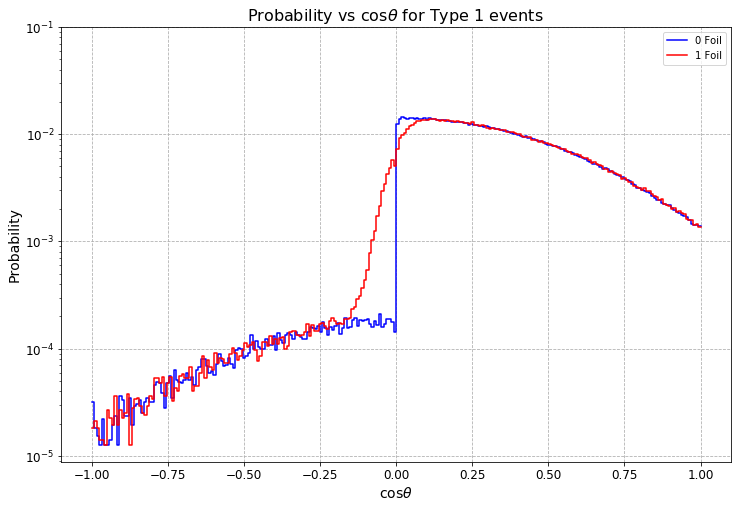

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(foil0type1Det1['costh'], stat = 'probability', log_scale=(False, True),element='step', fill = False, color = 'blue', label="0 Foil")
sns.histplot(foil1type1Det1['costh'], stat = 'probability', log_scale=(False, True),element='step', fill = False, color = 'red', label="1 Foil")
#sns.histplot(foil2type1Det1['costh'], stat = 'probability', log_scale=(False, True),element='step', fill = False, color = 'green', label="2 Foil")
plt.xlabel(r'cos$\theta$', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.ylim(0.0, 0.1)
#plt.xlim(0,1)
plt.xticks(fontsize = 12)
plt.yticks (fontsize = 12)
plt.grid(linestyle = '--')
plt.title(r'Probability vs cos$\theta$ for Type 1 events ', fontsize = 16)
plt.legend()
plt.savefig('./NewProbVsCosThType11-NoTwoFoil.png')

for type 1 evvnts emitted in the direction of the detector 1 . The chances of backscattering is more when the angle is large or cos th is 0 which is also shown in the graph. While fo electrons emitted in direction 2 is cos th< 0 they get backscattere by the decay trap and hits detectpr 1 first and then go to detector 2. The ones that are emitted with 0 angle and in direction of detector 2 and get backscattered and hit detector 1 first such events are very small ~  10-4 

In [20]:
def avgEvsetof(df, detectorE):
    mean_stat = scipy.stats.binned_statistic(x = df['etof'], values = df[detectorE], statistic='mean', bins = 60, range = (20e-09, 140e-09))
    meanE = mean_stat.statistic
    meanetof = mean_stat.bin_edges[1:]
    return meanE, meanetof
    

In [21]:
foil0E1, foil0etof1 = avgEvsetof(foil0type1Det1eTof, detectorE='E1')
foil1E1, foil1etof1 = avgEvsetof(foil1type1Det1eTof, detectorE='E1')
#foil2E1, foil2etof1 = avgEvsetof(foil2type1Det1eTof, detectorE='E1')

In [22]:
foil0E2, foil0etof2 = avgEvsetof(foil0type1Det1eTof, detectorE='E2')
foil1E2, foil1etof2 = avgEvsetof(foil1type1Det1eTof, detectorE='E2')
#foil2E2, foil2etof2 = avgEvsetof(foil2type1Det1eTof, detectorE='E2')

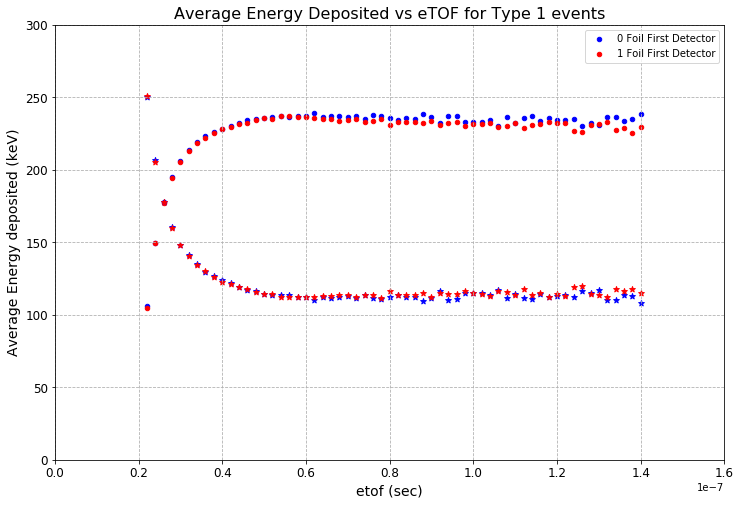

In [31]:
plt.figure(figsize = (12, 8))
plt.scatter(foil0etof1, foil0E1, s = 20,marker = 'o',color = 'blue', label = '0 Foil First Detector')
plt.scatter(foil1etof1, foil1E1, s = 20,marker = 'o',color = 'red', label = '1 Foil First Detector')
#plt.scatter(foil2etof1, foil2E1,alpha = 0.9, s = 20,marker = 'o',color = 'green', label = '2 Foils')
plt.scatter(foil0etof2, foil0E2,marker = '*',color = 'blue')
plt.scatter(foil1etof2, foil1E2,marker = '*',color = 'red')
#plt.scatter(foil2etof2, foil2E2,alpha = 0.9,marker = '*',color = 'green')
plt.legend()
plt.xlim(0e-09, 160e-09)
plt.ylim(0, 300)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(linestyle = '--')
plt.xlabel('etof (sec)', fontsize = 14)
plt.ylabel('Average Energy deposited (keV)', fontsize = 14)
plt.title('Average Energy Deposited vs eTOF for Type 1 events', fontsize = 16)
plt.savefig('AvgEnergyeTOFType1events-No2Foil.png')


### avg $cos\theta$ vs etof 

In [28]:
def avgcosThetavsetof(df):
    mean_stat = scipy.stats.binned_statistic(x = df['etof'], values = df['costh'], statistic='mean', bins = 40, range = (20e-09, 140e-09))
    meanCosth = mean_stat.statistic
    meanetof = mean_stat.bin_edges[1:]
    return meanCosth, meanetof

In [29]:
cosThfoil0, etofFoil0 = avgcosThetavsetof(foil0type1Det1)
cosThfoil1, etofFoil1 = avgcosThetavsetof(foil1type1Det1)
#cosThfoil2, etofFoil2 = avgcosThetavsetof(foil2type1Det1)

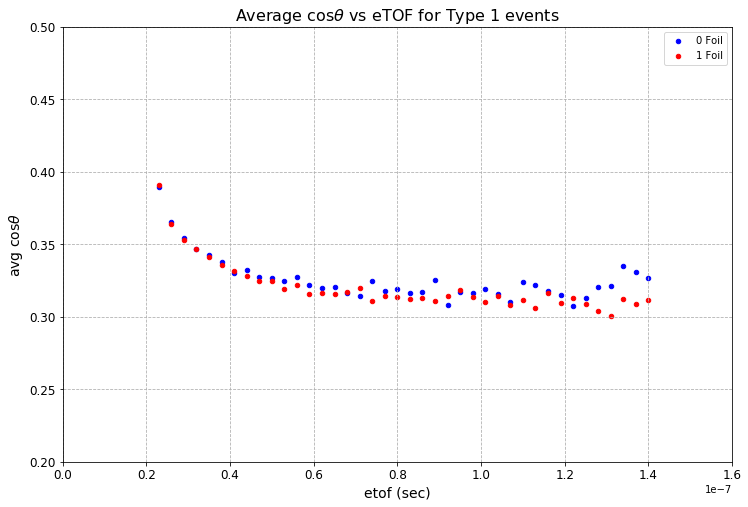

In [32]:
plt.figure(figsize = (12, 8))
plt.scatter(etofFoil0,cosThfoil0, s = 20,label = '0 Foil',color = 'blue')
plt.scatter(etofFoil1,cosThfoil1, s = 20,label = '1 Foil',color = 'red')
#plt.scatter(etofFoil2,cosThfoil2, s = 20,label = '2 Foil',color = 'green')
plt.xlim(0, 160e-09)
plt.legend()
plt.ylim(0.2, 0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(linestyle = '--')
plt.xlabel('etof (sec)',  fontsize = 14)
plt.ylabel(r'avg cos$\theta$',  fontsize = 14)
plt.title(r'Average cos$\theta$ vs eTOF for Type 1 events', fontsize = 16)
plt.savefig('AvgcosTheTOFType1events-No2Foil.png')


## Type 0 

In [64]:
def type01(df):
    df = df[df['KE']<370]
    df = df[df['E2'] == 0]
    df = df.drop(["KE", "E1","E2","t1","t2"], axis = 1)
    return df

In [65]:
def type0(df):
    df = df[df['KE']<370]
    df = df[df['E2'] == 0]
    df = df.drop(["KE","costh","t1","t2"], axis = 1)
    return df

In [33]:
foil0type0 = pd.read_csv('./foil0-type0.txt', index_col=False,sep = " ", dtype = type,header = None, names = columns)


In [141]:
foil0type0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98139386 entries, 0 to 98139385
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   KE      uint16 
 1   E1      float32
 2   E2      float32
 3   t1      float32
 4   t2      float32
 5   costh   float32
dtypes: float32(5), uint16(1)
memory usage: 2.0 GB


In [67]:
foil0type0 = type01(foil0type0)

In [34]:
foil1type0 = pd.read_csv('./foil1-type0.txt', index_col=False,sep = " ", dtype = type,header = None, names = columns)


In [10]:
foil1type0 = type0(foil1type0)

In [66]:
foil1type0 = type01(foil1type0)

In [36]:
foil1type0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40372806 entries, 1 to 98036419
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   costh   float32
dtypes: float32(1)
memory usage: 462.0 MB


In [11]:
foil2type0 = pd.read_csv('./foil2-type0.txt', index_col=False,sep = " ", dtype = type,header = None, names = columns)


In [12]:
foil2type0= type0(foil2type0)

In [ ]:
sns.histplot(foil0type0['E1'])

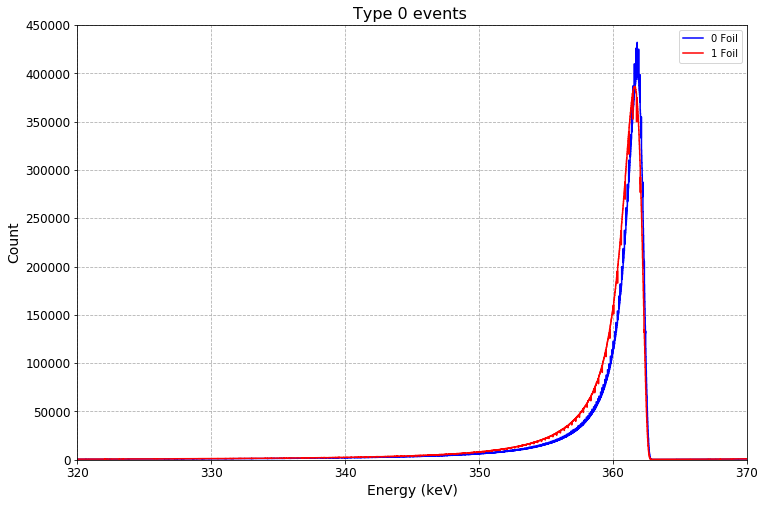

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(foil0type0['E1']+foil0type0['E2'], stat = 'count', binrange=[320,370],element='step', fill = False, color = 'blue', label="0 Foil")
sns.histplot(foil1type0['E1']+foil1type0['E2'], stat = 'count', binrange=[320,370],element='step', fill = False, color = 'red', label="1 Foil")
#sns.histplot(foil2type0['E1'], stat = 'count', binrange=[300,380],element='step', fill = False, color = 'green', label="2 Foil")
plt.xlabel('Energy (keV)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.ylim(0.0, 450000)
plt.xlim(320,370)
plt.xticks(fontsize = 12)
plt.yticks (fontsize = 12)
plt.grid(linestyle = '--')
plt.title(r'Type 0 events ', fontsize = 16)
plt.legend()
plt.savefig('./type0SpectraZoomNoSecondFoil.png')

In [17]:
foil2type0 = type01(foil2type0)

In [30]:
foil0type1Det1.head()

,E1,E2,t1,t2,costh,etof
1,324.087006,25.836201,2.033100e-08,1.599550e-07,0.177771,1.396240e-07
4,244.733002,115.223999,3.521630e-08,7.365400e-08,0.296519,3.843770e-08
5,198.727997,153.076004,3.376940e-08,9.985930e-08,0.330071,6.608990e-08
8,241.774002,117.274002,8.167090e-07,8.434440e-07,0.009440,2.673499e-08
9,280.157990,72.415497,4.398050e-08,9.936480e-08,0.190601,5.538430e-08


In [70]:
foil0type1Det1eTof = foil0type1Det1eTof.drop(['E1', 'E2', 'etof'], axis = 1)


In [69]:
foil1type1Det1eTof = foil1type1Det1eTof.drop(['E1', 'E2', 'etof'], axis = 1)
#foil2type1Det1eTof = foil2type1Det1eTof.drop(['E1', 'E2', 'etof'], axis = 1)

In [71]:
foil0 = pd.concat([foil0type0, foil0type1Det1eTof], ignore_index=True)

In [72]:
foil1 = pd.concat([foil1type0, foil1type1Det1eTof], ignore_index=True)
#foil2  = pd.concat([foil2type0, foil2type1Det1eTof], ignore_index=True)

In [37]:
(foil0['costh']<0).sum()

8733

In [41]:
foil0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41116680 entries, 0 to 41116679
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   costh   float32
dtypes: float32(1)
memory usage: 156.8 MB


In [42]:
800000/41116680

0.01945682384861813

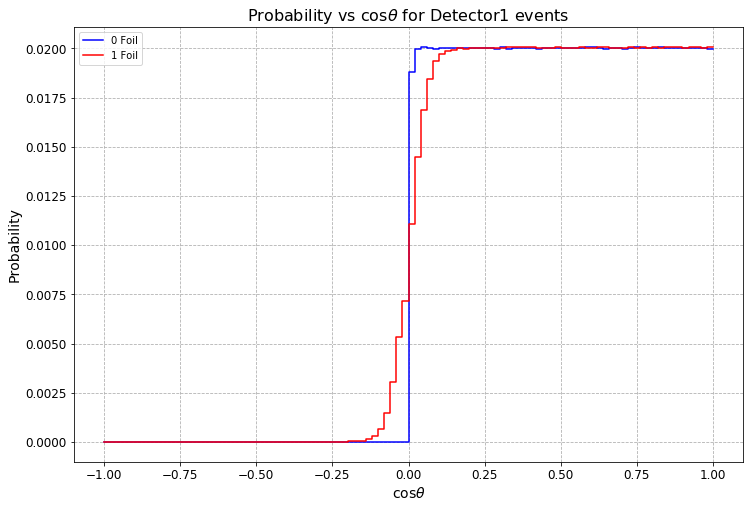

In [73]:
plt.figure(figsize=(12,8))
sns.histplot(foil0['costh'], stat = 'probability', element='step',bins=100, binrange=[-1,1], fill = False, color = 'blue', label="0 Foil")
sns.histplot(foil1['costh'], stat = 'probability', element='step',bins=100, binrange=[-1,1], fill = False, color = 'red', label="1 Foil")
#sns.histplot(foil2['costh'], stat = 'probability', element='step',bins=100, binrange=[-1,1], fill = False, color = 'green', label="2 Foil")
plt.xlabel(r'cos$\theta$', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
#plt.ylim(0., 0.02)
#plt.xlim(0,1)
plt.xticks(fontsize = 12)
plt.yticks (fontsize = 12)
plt.grid(linestyle = '--')
plt.title(r'Probability vs cos$\theta$ for Detector1 events ', fontsize = 16)
plt.legend()
plt.savefig('./detector1ALLcosthNoTwoFoil.png')


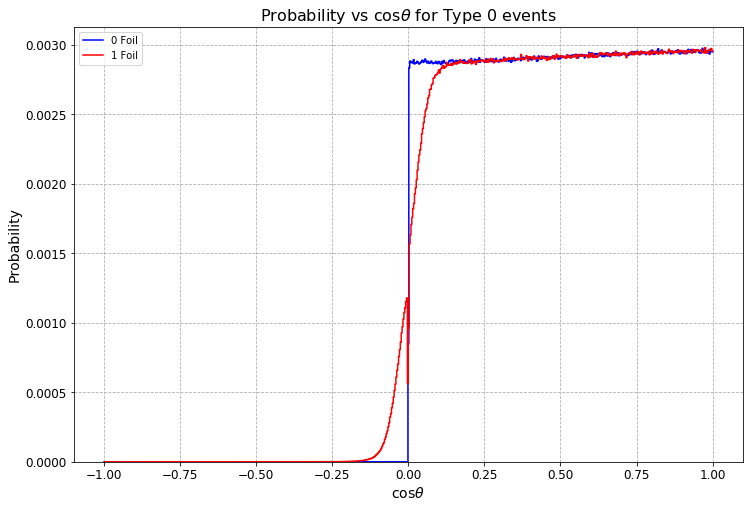

In [68]:
plt.figure(figsize=(12,8))
sns.histplot(foil0type0['costh'], stat = 'probability', element='step', fill = False, color = 'blue', label="0 Foil")
sns.histplot(foil1type0['costh'], stat = 'probability', element='step', fill = False, color = 'red', label="1 Foil")
#sns.histplot(foil2type0['costh'], stat = 'probability', element='step', fill = False, color = 'green', label="2 Foil")
plt.xlabel(r'cos$\theta$', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
#plt.ylim(0., 0.02)
#plt.xlim(0,1)
plt.xticks(fontsize = 12)
plt.yticks (fontsize = 12)
plt.grid(linestyle = '--')
plt.title(r'Probability vs cos$\theta$ for Type 0 events ', fontsize = 16)
plt.legend()
plt.savefig('./detector1costhNoTwoFoil.png')


## Fraction of type of Events

In [39]:
foil = [0,1]

In [1]:
fractionType0  = [98139386/1e8, 98036421/1e8]#,98047594/1e8 ]

In [2]:
fractionType0

[0.98139386, 0.98036421]

In [10]:
fractionType1  = [1743307/1e8,1731351/1e8]#, 1718486/1e8 ]
fractionType1

[0.01743307, 0.01731351]

In [9]:
import numpy as np
np.sum(fractionType0, fractionType1)

TypeError: 'list' object cannot be interpreted as an integer

In [6]:
fractionDead  = [117307/1e8, 232228/1e8]#,  233919/1e8]
fractionDead

[0.00117307, 0.00232228]

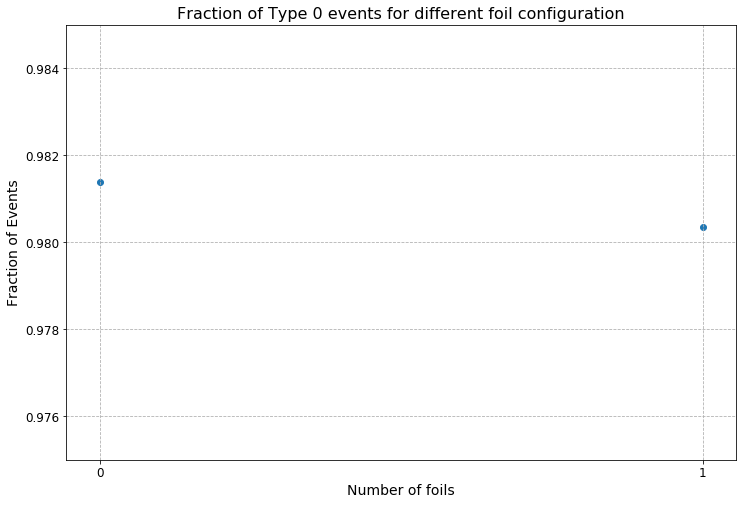

In [51]:
plt.figure(figsize=(12,8))
plt.scatter(foil, fractionType0)
plt.xlabel('Number of foils', fontsize = 14)
plt.ylabel('Fraction of Events', fontsize = 14)
plt.ylim(0.975, 0.985)
#plt.xlim(0,1)
plt.xticks(np.arange(0,2,1),fontsize = 12)
plt.yticks (fontsize = 12)
plt.grid(linestyle = '--')
plt.title('Fraction of Type 0 events for different foil configuration', fontsize = 16)
#plt.legend()
plt.savefig('./FractionType0diffFoilNo2Foil.png')

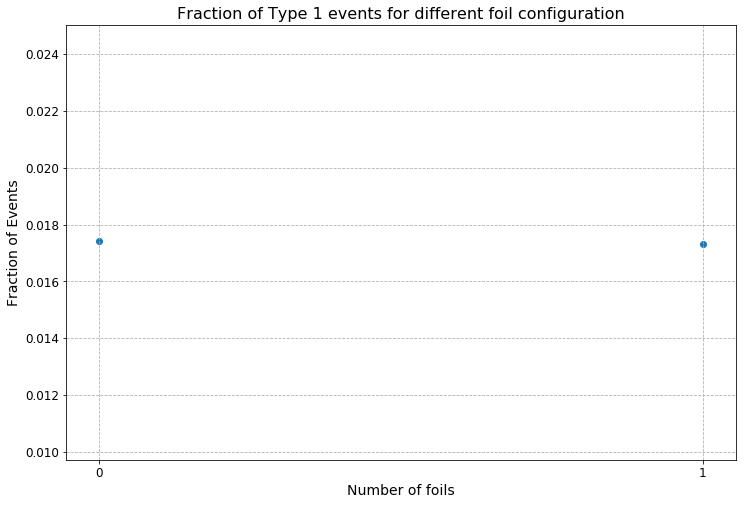

In [63]:
plt.figure(figsize=(12,8))
plt.scatter(foil, fractionType1)
plt.xlabel('Number of foils', fontsize = 14)
plt.ylabel('Fraction of Events', fontsize = 14)
#plt.ylim(0.014, 0.022)
#plt.xlim(0,1)
plt.xticks(np.arange(0,2,1),fontsize = 12)
plt.yticks (fontsize = 12)
plt.grid(linestyle = '--')
plt.title('Fraction of Type 1 events for different foil configuration', fontsize = 16)
#plt.legend()
plt.savefig('./FractionType1diffFoilNo2Foil.png')

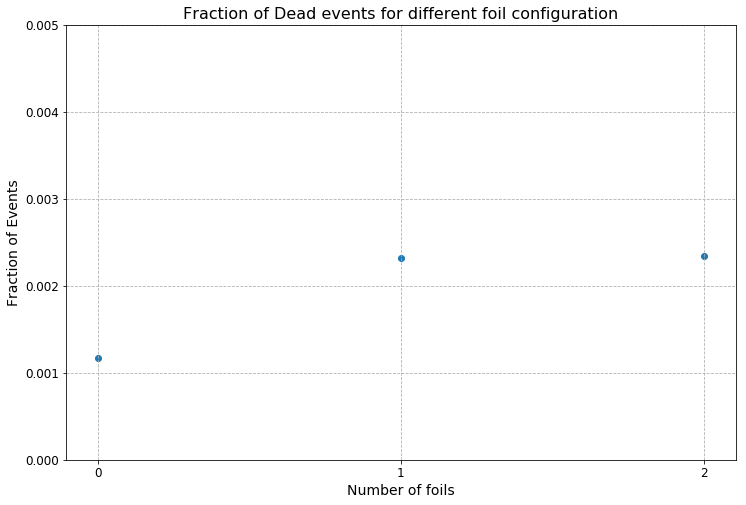

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(foil, fractionDead)
plt.xlabel('Number of foils', fontsize = 14)
plt.ylabel('Fraction of Events', fontsize = 14)
plt.ylim(0., 0.005)
#plt.xlim(0,1)
plt.xticks(np.arange(0,3,1),fontsize = 12)
plt.yticks (fontsize = 12)
plt.grid(linestyle = '--')
plt.title('Fraction of Dead events for different foil configuration', fontsize = 16)
#plt.legend()
plt.savefig('./FractionDeadEvtsDiffFoil.png')